In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data plotting and visualisation
import seaborn as sns #data plotting and visualisation

import opendatasets as od #to download dataset
od.download("https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction")

Skipping, found downloaded files in ".\bank-customer-churn-prediction" (use force=True to force download)


In [38]:
#loading the dataset

data = pd.read_csv("bank-customer-churn-prediction/Churn_Modelling.csv")
print(data.head(5))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [39]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

to_drop = ['RowNumber','CustomerId'] #thest features will be dropped 
data.drop(columns = to_drop,inplace=True)

#encoded features - Gender,Geography
data['Geography'] = enc.fit_transform(data['Geography'])
data['Geography'] = data['Geography'].astype('category')
data['Gender'] = enc.fit_transform(data['Gender'])
data['Gender'] = data['Gender'].astype('category')
data['Surname'] = enc.fit_transform(data['Surname'])
data['Surname'] = data['Surname'].astype('category')
data['HasCrCard'] = data['HasCrCard'].astype('category')
data['IsActiveMember'] = data['IsActiveMember'].astype('category')

print(data.head(3))

  Surname  CreditScore Geography Gender  Age  Tenure    Balance  \
0    1115          619         0      0   42       2       0.00   
1    1177          608         2      0   41       1   83807.86   
2    2040          502         0      0   42       8  159660.80   

   NumOfProducts HasCrCard IsActiveMember  EstimatedSalary  Exited  
0              1         1              1        101348.88       1  
1              1         0              1        112542.58       0  
2              3         1              0        113931.57       1  


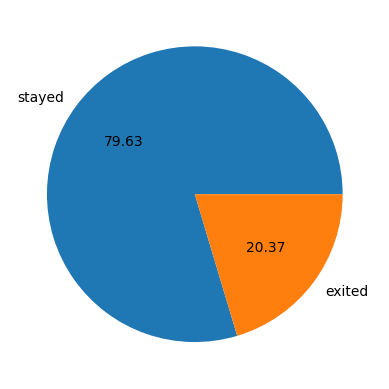

In [40]:
#displaying percentage of exited customers

count = data['Exited'].value_counts()
plt.pie(count,labels=['stayed','exited'],autopct='%.2f')
plt.show()

In [41]:
#libraries for training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve

In [42]:
#train-test split
x = data.drop(columns='Exited')
y = data['Exited']
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,stratify=y,shuffle=True,random_state=42)

In [43]:
#applying standard scaler on train and test data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_x = scale.fit_transform(train_x)
test_x = scale.transform(test_x)

In [44]:
#models to be evaluated

GB = GradientBoostingClassifier(random_state=42)
LR = LogisticRegression(penalty='l1',solver='liblinear',random_state=42)
RF = RandomForestClassifier(n_estimators=150,random_state=42)

In [45]:
#evaluation function to display accuracy,precision,recall,F1_score and confusion matrix

def evaluate(model):
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x)
    prob_y = model.predict_proba(test_x)[:,1]

    #scores 
    print("accuracy : ",accuracy_score(test_y,pred_y))
    print("precision : ",precision_score(test_y,pred_y))
    print("recall : ",recall_score(test_y,pred_y))
    print("F1_score : ",f1_score(test_y,pred_y))

    #confusion matrix based on predicted class
    matrix = confusion_matrix(test_y, pred_y)
    sns.heatmap(matrix,annot=True)
    plt.title("Confusion Matrix")
    plt.show()

    #ROC-curve based on probability of classes
    fpr, tpr, threshold = roc_curve(test_y, prob_y)
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC curve")
    plt.show()

Gradient Boosting Classifier - 
accuracy :  0.8703333333333333
precision :  0.7952127659574468
recall :  0.48936170212765956
F1_score :  0.6058763931104356


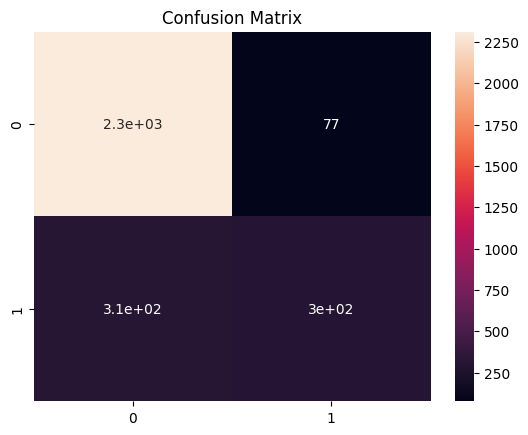

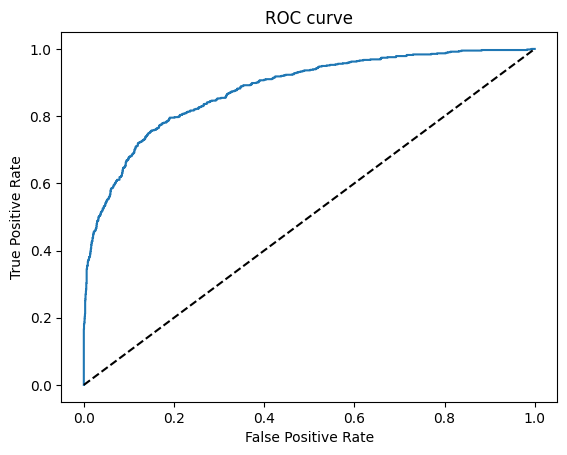

In [46]:
print("Gradient Boosting Classifier - ")
evaluate(GB)

Random Forest Classifier (n_estimators = 150) - 
accuracy :  0.8673333333333333
precision :  0.7950138504155124
recall :  0.469721767594108
F1_score :  0.5905349794238683


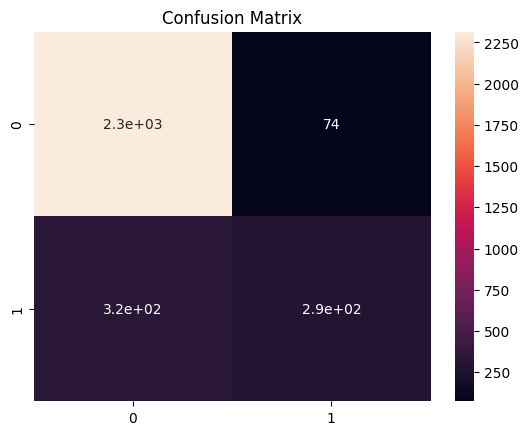

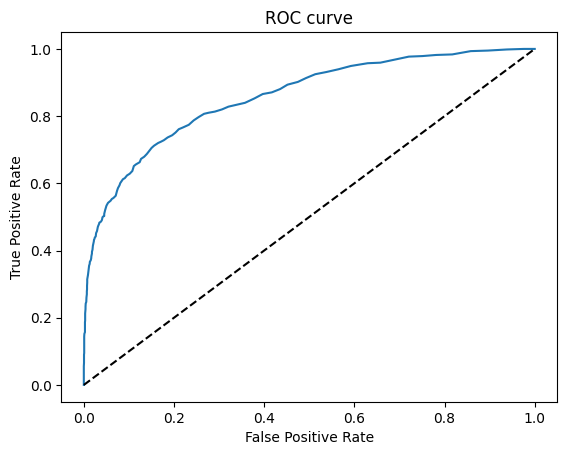

In [47]:
print("Random Forest Classifier (n_estimators = 150) - ")
evaluate(RF)

Logistic Regression (penalty='l1',solver='liblinear') - 
accuracy :  0.8153333333333334
precision :  0.7021276595744681
recall :  0.16202945990180032
F1_score :  0.2632978723404255


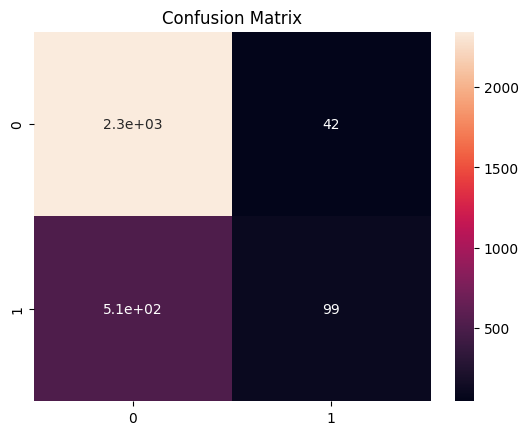

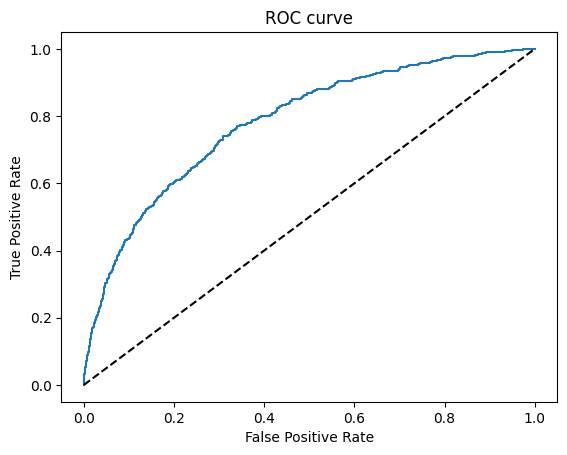

In [48]:
print("Logistic Regression (penalty='l1',solver='liblinear') - ")
evaluate(LR)